<a href="https://colab.research.google.com/github/Pentuhov/PR.AI-2/blob/main/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_%D0%94%D0%97_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [ ]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [ ]:
# ваше решение

In [ ]:
# Определение модели
model = Sequential([
    Dense(64, input_shape=(13,), activation='relu'), # Входной слой
    Dense(128, activation='relu'),                   # Скрытый слой
    Dense(64, activation='relu'),                    # Скрытый слой
    Dense(3, activation='softmax')                   # Выходной слой
])

C:\Users\Terion\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=60, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.7376 - loss: 3.0007 - val_accuracy: 0.6875 - val_loss: 0.7131
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5668 - loss: 1.1071 - val_accuracy: 0.6250 - val_loss: 0.7113
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6840 - loss: 0.8211 - val_accuracy: 0.8125 - val_loss: 0.3665
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8049 - loss: 0.4883 - val_accuracy: 1.0000 - val_loss: 0.2820
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8088 - loss: 0.5125 - val_accuracy: 0.7500 - val_loss: 0.4889
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7116 - loss: 0.6612 - val_accuracy: 0.9375 - val_loss: 0.2719
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7917 - loss: 0.5225 - val_accuracy: 0.9375 - val_loss: 0.3117
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8021 - loss: 0.4471 - val_accuracy: 0.9375 - val_loss: 0.2759

In [ ]:
# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Выводим количество параметров модели
model.summary()

Test Accuracy: 94.44%


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,003 (207.05 KB)

 Trainable params: 17,667 (69.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,336 (138.04 KB)

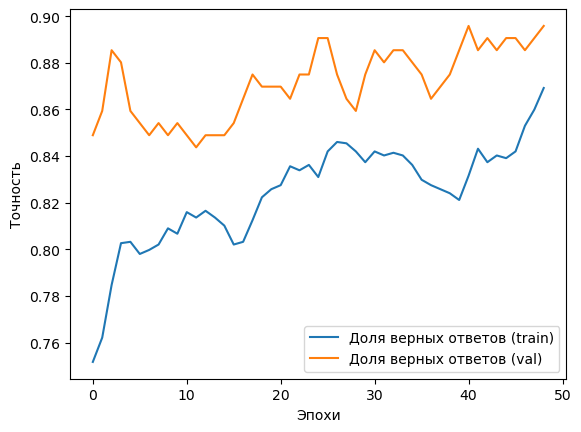

In [ ]:
window_size = 12
smoothed_train_accuracy = np.convolve(history.history['accuracy'], np.ones(window_size)/window_size, mode='valid')
smoothed_val_accuracy = np.convolve(history.history['val_accuracy'], np.ones(window_size)/window_size, mode='valid')
# Визуализация результатов обучения
plt.plot(smoothed_train_accuracy, label='Доля верных ответов (train)')
plt.plot(smoothed_val_accuracy, label='Доля верных ответов (val)')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

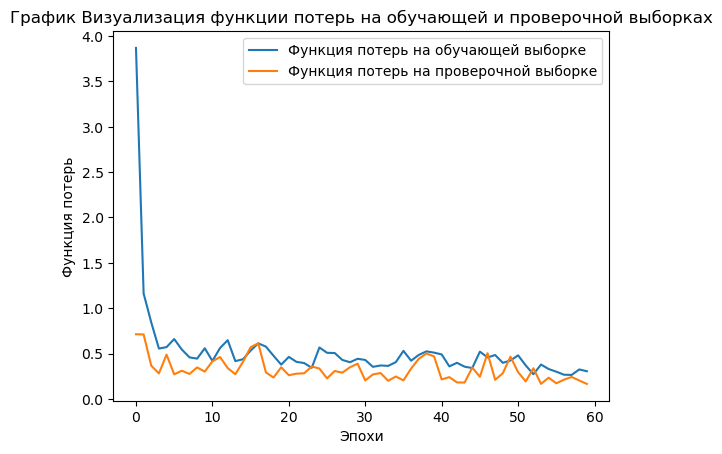

In [ ]:
# Визуализация функции потерь на обучающей и проверочной выборках
plt.plot(history.history['loss'], label='Функция потерь на обучающей выборке')
plt.plot(history.history['val_loss'], label='Функция потерь на проверочной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Функция потерь')
plt.title('График Визуализация функции потерь на обучающей и проверочной выборках')
plt.legend()
plt.show()

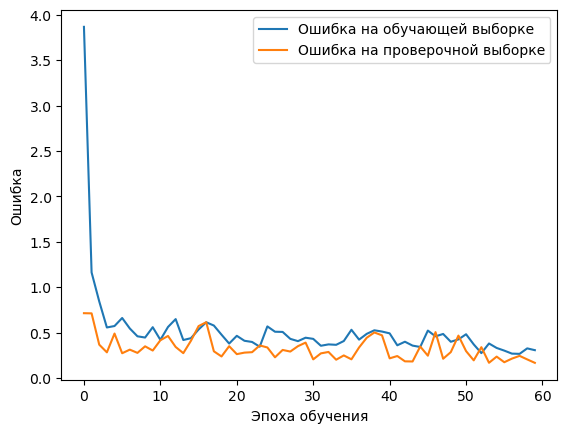

In [ ]:
import matplotlib.pyplot as plt

# Создание графика ошибок на обучающем и проверочном наборах
plt.plot(history.history['loss'], label='Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label='Ошибка на проверочной выборке')

# Добавление подписей к осям и легенды
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()

# Отображение графика
plt.show()
